## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import warnings as w
w.filterwarnings('ignore')

## Loading the data files

In [2]:
books = pd.read_csv("BX-Books.csv", encoding= 'latin-1')
users = pd.read_csv("BX-Users.csv", encoding= 'latin-1')
ratings = pd.read_csv("BX-Book-Ratings.csv", encoding= 'latin-1')

## Exploratory data analysis (EDA)

#### Books Dataset

In [3]:
books.shape

(271379, 5)

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271377 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


#### Users Dataset

In [5]:
users.shape

(278859, 3)

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


#### Ratings Dataset

In [7]:
ratings.shape

(1048575, 3)

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


<Axes: xlabel='rating'>

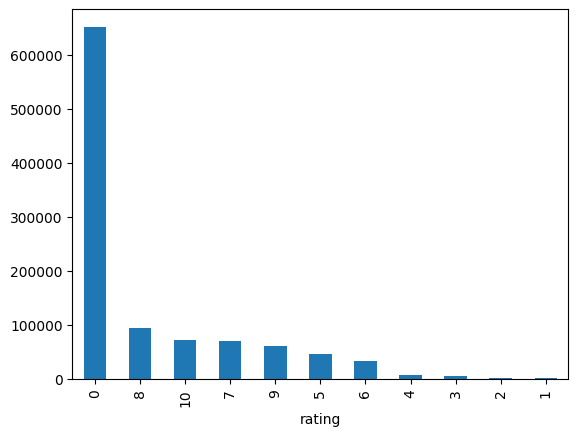

In [9]:
ratings['rating'].value_counts().plot(kind='bar')

#### Find & Clean NaN values in Dataset

In [10]:
books.isna().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64

In [11]:
books.dropna(inplace=True)

In [12]:
books.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [13]:
books["year_of_publication"].value_counts().index.values

array(['2002', '1999', '2001', '2000', '1998', '1997', '2003', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '2004', '1986', '1985', '1984', '0', '1983', '1982',
       '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974',
       '1973', '1972', 2000, '1971', 2001, 1999, 1997, 1998, 2002, 1996,
       2003, '1970', 1995, 1994, 1992, 1993, 1991, '1969', 1989, 1990,
       1988, 1987, '1968', 1986, 1985, 1984, 2004, '1965', '1966', '1967',
       1983, 1982, 0, '1964', 1981, '1960', '1961', '1963', '1962',
       '1959', 1978, 1980, '1958', '1957', 1979, '1956', 1977, '1955',
       '1953', 1976, 1975, '1954', '2005', 1973, 1974, '1951', '1940',
       '1952', '1920', '1950', 1970, 1972, 1971, '1911', '1942', '1947',
       1966, '1946', '1930', '1923', '1941', '1949', '1939', '1948',
       '1945', 1969, 1964, '1943', '1936', '2030', '1938', '1929', 1967,
       '1932', '1901', '1937', 1968, '1944', '1933', 1951, '2006', 1960,
  

In [14]:
books["year_of_publication"].shape

(271375,)

In [15]:
years = books["year_of_publication"].astype(str).str.isnumeric()

books = books[years]

In [16]:
books["year_of_publication"].value_counts().index.values

array(['2002', '1999', '2001', '2000', '1998', '1997', '2003', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '2004', '1986', '1985', '1984', '0', '1983', '1982',
       '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974',
       '1973', '1972', 2000, '1971', 2001, 1999, 1997, 1998, 2002, 1996,
       2003, '1970', 1995, 1994, 1992, 1993, 1991, '1969', 1989, 1990,
       1988, 1987, '1968', 1986, 1985, 1984, 2004, '1965', '1966', '1967',
       1983, 1982, 0, '1964', 1981, '1960', '1963', '1961', '1962',
       '1959', 1978, 1980, '1958', '1957', 1979, '1956', 1977, '1955',
       '1953', 1976, 1975, '1954', '2005', 1973, 1974, '1951', '1940',
       '1952', '1920', '1950', 1970, 1972, '1911', 1971, '1947', '1942',
       1966, '1946', '1930', '1923', '1941', '1949', '1948', '1939',
       '1945', 1969, 1964, '1936', '1943', '2030', '1938', 1967, '1929',
       '1901', '1937', '1932', 1968, '1944', '1933', 1951, '2006', '1935',


In [17]:
books["year_of_publication"].shape

(271353,)

In [18]:
books["year_of_publication"] = books["year_of_publication"].astype(int)

books["publication_date"] = pd.to_datetime(books["year_of_publication"], format='%Y', errors = 'coerce')

books.drop(columns=['year_of_publication'], inplace= True)

books = pd.DataFrame(books)

In [19]:
books

,isbn,book_title,book_author,publisher,publication_date
0,195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2002-01-01
1,2005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,2001-01-01
2,60973129,Decision in Normandy,Carlo D'Este,HarperPerennial,1991-01-01
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,1999-01-01
4,393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,1999-01-01
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),1988-01-01
271375,525447644,From One to One Hundred,Teri Sloat,Dutton Books,1991-01-01
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,2004-01-01
271377,192126040,Republic (World's Classics),Plato,Oxford University Press,1996-01-01


In [20]:
books["Year_of_publication"] = books["publication_date"].dt.year

In [21]:
books

,isbn,book_title,book_author,publisher,publication_date,Year_of_publication
0,195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2002-01-01,2002.0
1,2005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,2001-01-01,2001.0
2,60973129,Decision in Normandy,Carlo D'Este,HarperPerennial,1991-01-01,1991.0
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,1999-01-01,1999.0
4,393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,1999-01-01,1999.0
...,...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),1988-01-01,1988.0
271375,525447644,From One to One Hundred,Teri Sloat,Dutton Books,1991-01-01,1991.0
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,2004-01-01,2004.0
271377,192126040,Republic (World's Classics),Plato,Oxford University Press,1996-01-01,1996.0


In [22]:
books["Year_of_publication"].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [23]:
books = books[~(books["Year_of_publication"] == 2037)]
books = books[~(books["Year_of_publication"] == 2026)]
books = books[~(books["Year_of_publication"] == 2038)]
books = books[~(books["Year_of_publication"] == 2050)]
books = books[~(books["Year_of_publication"] == 2030)]


In [24]:
books["Year_of_publication"].shape

(271341,)

In [25]:
# Now Books dataset has been cleaned up

In [26]:
users.isnull().sum()

user_id          0
Location         1
Age         110763
dtype: int64

In [27]:
users.dropna(inplace=True)

In [28]:
users.isnull().sum()

user_id     0
Location    0
Age         0
dtype: int64

In [29]:
ratings.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [30]:
#Now all 3 datasets have null values cleaned up

## Read the data where ratings are given by users

In [31]:
# Ratings Dataset already read and checked for NaN values

In [32]:
x = ratings["user_id"].value_counts() > 200
y = x[x].index

In [33]:
y.shape

(815,)

### The number of users who have rated more than 200 times is 815 

# Popularity based recomender system
Extract books that have received more than 50 ratings

## Merge Ratings with Books

In [34]:
ratings_with_books = ratings.merge(books, on = "isbn")

In [35]:
ratings_with_books.head()

,user_id,isbn,rating,book_title,book_author,publisher,publication_date,Year_of_publication
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0


In [36]:
ratings_with_books.shape

(941053, 8)

In [37]:
number_rating = ratings_with_books.groupby('book_title')['rating'].count().reset_index()
number_rating.rename(columns= {'rating':'number_of_rating'}, inplace=True)
number_rating.head()

,book_title,number_of_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [38]:
final_rating = ratings_with_books.merge(number_rating, on='book_title')

In [39]:
final_rating = final_rating[final_rating['number_of_rating'] >= 50]
final_rating.drop_duplicates(['user_id','book_title'], inplace=True)

In [40]:
final_rating.head()

,user_id,isbn,rating,book_title,book_author,publisher,publication_date,Year_of_publication,number_of_rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,53
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,53
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,53
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,53
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,53


## Take a quick look at the number of unique users and books.

#### Number of Unique Users

In [41]:
u_users = ratings_with_books['user_id'].nunique()

In [42]:
print("Number of users: {} ".format(u_users))

Number of users: 83639 


## Number of Unique Books

In [43]:
u_books = ratings_with_books['book_title'].nunique()

In [44]:
print("Number of books: {}".format(u_books))

Number of books: 230203


## Convert ISBN variables to numeric numbers in the correct order

In [45]:
# convert ISBN into the numeric number.
list_isbn = ratings_with_books.isbn.unique()

In [46]:
list_isbn

array(['034545104X', '155061224', '446520802', ..., '048623715X',
       '486256588', '515069434'], dtype=object)

In [47]:
print("length of ISBN list: ", len(list_isbn))

length of ISBN list:  257795


In [48]:
def isbn_numeric(isbn):
    itemindex = np.where(list_isbn==isbn)
    return itemindex[0][0]

## Convert user_id variables to numeric numbers in the correct order

In [49]:
# convert user_id into the numeric number.
list_userid = ratings_with_books.user_id.unique()

In [50]:
list_userid

array([276725,   2313,   6543, ..., 250692, 250707, 250757], dtype=int64)

In [51]:
print("length of user_id list: ", len(list_userid))

length of user_id list:  83639


In [52]:
def userid_numeric(user_id):
    itemindex = np.where(list_userid==user_id)
    return itemindex[0][0]

## Convert both user_id and ISBN to the ordered list, i.e., from 0...n-1

In [53]:
ratings_with_books['user_id_order'] = ratings_with_books['user_id'].apply(userid_numeric)

In [54]:
ratings_with_books['isbn_order'] = ratings_with_books['isbn'].apply(isbn_numeric)

In [55]:
ratings_with_books.head()

,user_id,isbn,rating,book_title,book_author,publisher,publication_date,Year_of_publication,user_id_order,isbn_order
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,0,0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,1,0
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,2,0
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,3,0
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002-01-01,2002.0,4,0


## Re-index the columns to build a matrix

In [56]:
ratings_with_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941053 entries, 0 to 941052
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              941053 non-null  int64         
 1   isbn                 941053 non-null  object        
 2   rating               941053 non-null  int64         
 3   book_title           941053 non-null  object        
 4   book_author          941053 non-null  object        
 5   publisher            941053 non-null  object        
 6   publication_date     928273 non-null  datetime64[ns]
 7   Year_of_publication  928273 non-null  float64       
 8   user_id_order        941053 non-null  int64         
 9   isbn_order           941053 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 71.8+ MB


In [57]:
reorder_col = ['user_id_order', 'isbn_order', 'rating', 'book_title', 'book_author', 'year_of_publication', 'publisher', 
               'user_id', 'isbn']
ratings_with_books = ratings_with_books.reindex(columns=reorder_col)

In [58]:
ratings_with_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941053 entries, 0 to 941052
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id_order        941053 non-null  int64  
 1   isbn_order           941053 non-null  int64  
 2   rating               941053 non-null  int64  
 3   book_title           941053 non-null  object 
 4   book_author          941053 non-null  object 
 5   year_of_publication  0 non-null       float64
 6   publisher            941053 non-null  object 
 7   user_id              941053 non-null  int64  
 8   isbn                 941053 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 64.6+ MB


In [59]:
ratings_with_books.head()

,user_id_order,isbn_order,rating,book_title,book_author,year_of_publication,publisher,user_id,isbn
0,0,0,0,Flesh Tones: A Novel,M. J. Rose,NaN,Ballantine Books,276725,034545104X
1,1,0,5,Flesh Tones: A Novel,M. J. Rose,NaN,Ballantine Books,2313,034545104X
2,2,0,0,Flesh Tones: A Novel,M. J. Rose,NaN,Ballantine Books,6543,034545104X
3,3,0,5,Flesh Tones: A Novel,M. J. Rose,NaN,Ballantine Books,8680,034545104X
4,4,0,9,Flesh Tones: A Novel,M. J. Rose,NaN,Ballantine Books,10314,034545104X


## Split your data into two sets (training and testing)

#### Import Libraries needed

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train, test = train_test_split(ratings_with_books, test_size = 0.30, random_state = 10)

In [62]:
train.shape

(658737, 9)

In [63]:
train.head()

,user_id_order,isbn_order,rating,book_title,book_author,year_of_publication,publisher,user_id,isbn
232863,148,11310,0,"Cry, the Beloved Country (Oprah's Book Club)",Alan Paton,NaN,Scribner,238120,743262174
136094,5122,5347,0,The Firm,John Grisham,NaN,Bantam Dell Publishing Group,243930,044021145X
183415,5846,8469,0,A Widow for One Year,JOHN IRVING,NaN,Ballantine Books,63293,345424719
7448,4810,309,0,The Da Vinci Code,Dan Brown,NaN,Doubleday,62457,385504209
860983,39788,189341,0,Jane Eyre (The World's best reading),Charlotte BrontÃ«,NaN,Reader's Digest Association,246526,895772000


In [64]:
test.shape

(282316, 9)

In [65]:
test.head()

,user_id_order,isbn_order,rating,book_title,book_author,year_of_publication,publisher,user_id,isbn
656376,1333,85016,8,Wycliffe and the Pea Green Boat,W. J. Burley,NaN,Dell Publishing,40012,440197171
833997,15469,171031,5,Discourse on Colonialism,AimÃ© CÃ©saire,NaN,New York University Press,127203,1583670254
638421,1109,78790,0,"CLOSING TIME : THE SEQUEL TO CATCH-22, A NOVEL BY",Joseph Heller,NaN,Simon &amp; Schuster,164675,671746049
818365,233,161149,0,Potpourri : Scented Souvenir (Scented Souvenirs),Outlet,NaN,Crescent,113519,517030829
271848,5174,14397,8,LA Ciudad De Las Bestias,Isabel Allende,NaN,Rayo,18384,60510323


## Make predictions based on user and item variables.

In [ ]:
train_matrix = np.zeros((u_users, u_books))
for line in train.itertuples():
    train_matrix[line[1]-1, line[2]-1] = line[3]

In [ ]:
test_matrix = np.zeros((u_users, u_books))
for line in test.itertuples():
    test_matrix[line[1]-1, line[2]-1] = line[3]

#### Import Libraries needed

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances 

In [ ]:
user_corelation = pairwise_distances(train_matrix, metric='cosine')

In [ ]:
item_corelation = pairwise_distances(train_matrix.T, metric='cosine')

In [ ]:
user_corelation

In [ ]:
def predict(ratings,correlation, type= 'user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        rating_diff = (ratings - mean_user_rating[:,np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + correlation.dot(rating_diff) / np.array([np.abs(correlation).sum(axis=1)]).T
        elif type == 'item':
        pred = ratings.dot(correlation) / np.array([np.abs(correlation).sum(axis=1)])
    return pred

In [ ]:
user_prediction = predict(train_matrix, user_correlation, type = 'user')

In [ ]:
item_prediction = predict(train_matrix, item_correlation, type = 'item')

In [ ]:
item_prediction.shape

## Use RMSE to evaluate the predictions.

#### Import Libraries needed

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def rmse(prediction, actual):
    prediction = prediction[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, actual))

In [ ]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_matrix)))

In [ ]:
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_matrix)))

## Recommend Books

#### Import Libraries needed

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
book_pivot = final_rating.pivot_table(columns="user_id", index="book_title", values="rating")
book_pivot.fillna(0, inplace=True)

In [ ]:
book_pivot

In [ ]:
similiarity_scores = cosine_similarity(book_pivot)

In [ ]:
def recommend(book_name):
    index = np.where(book_pivot.index == book_name)[0][0]
    similiar_items = sorted(list(enumerate(similiarity_scores[index])), key = lambda x:x[1], reverse=True)[1:5]
    
    data = []
    for i in similiar_items:
        item = []
        temp = books[books["book_title"] == book_pivot.index[i[0]]]
        item.extend(list(temp.drop_duplicates("book_title")["book_title"].values))
        item.extend(list(temp.drop_duplicates("book_title")["book_author"].values))
        
        data.append(item)
        
    return data


In [ ]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

In [ ]:
recommend("The Kitchen God's Wife")